In [12]:
from pulp import *
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.graph_objects as go 
import plotly.express as px

# The problems we solved with Linear Programing in this notebook 

*  Equations LP and Visualisation 
* Resources Allocation 
    - Farmer's problem 👩‍🌾 
* Knapsack problem 🎒🪙 
* SUDUKO

Youtube video for this notebook avaliable in Arabic 
https://youtu.be/UIe--cd-_jg?si=BOzK3YBf4l6Q4Awe

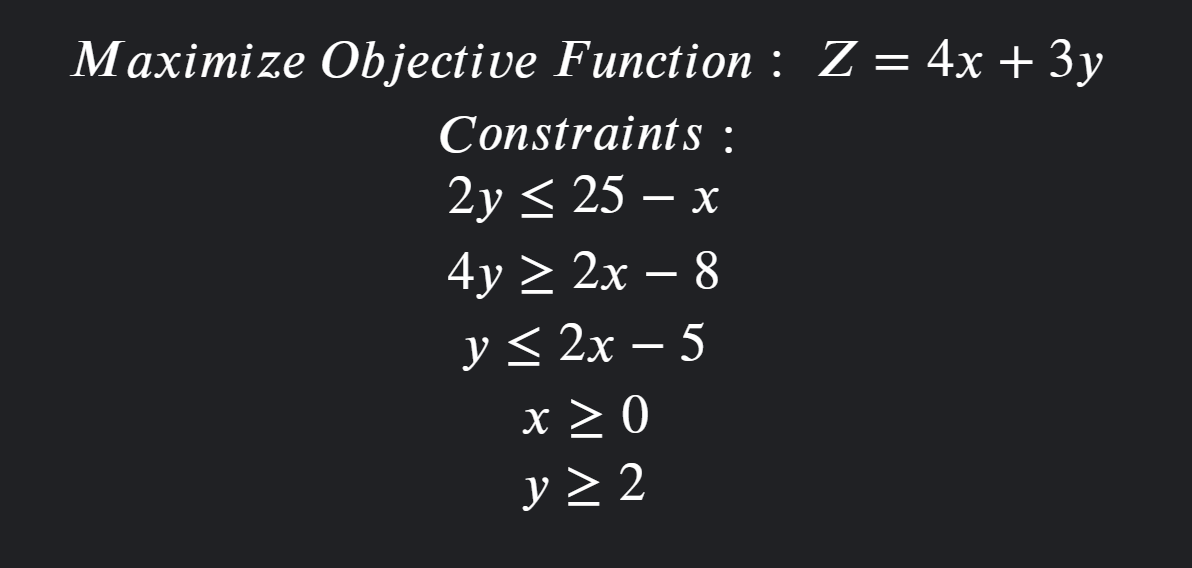

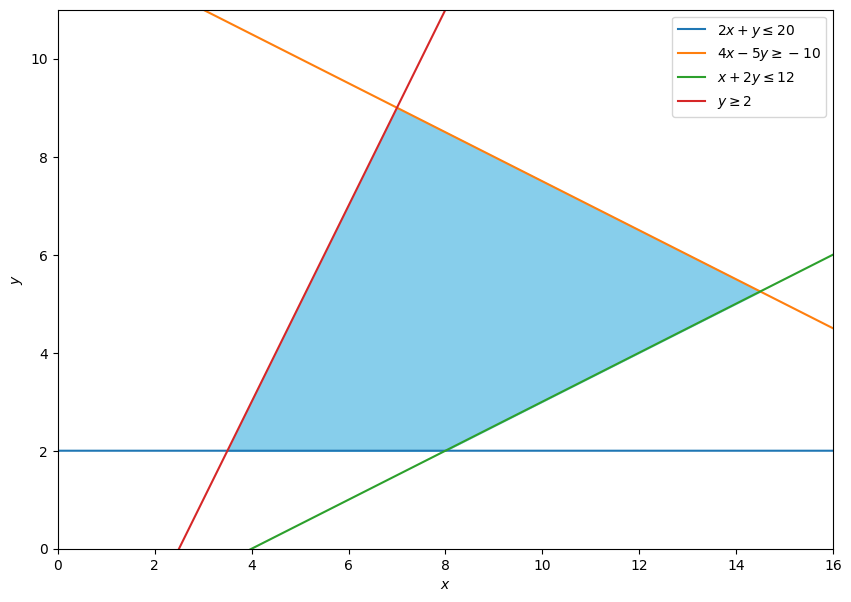

In [13]:
# Construct lines
# x > 0
x = np.linspace(0, 20, 2000)
# y >= 2
y1 = (x*0) + 2
# 2y <= 25 - x
y2 = (25-x)/2.0
# 4y >= 2x - 8 
y3 = (2*x-8)/4.0
# y <= 2x - 5 
y4 = 2 * x -5

# Make plot
plt.figure(figsize=(10,7))
# Plot the objective function
plt.plot(x, y1, label=r'$2x + y \leq 20$')
plt.plot(x, y2, label=r'$4x - 5y \geq -10$')
plt.plot(x, y3, label=r'$x + 2y \leq 12$')
plt.plot(x, y4,  label=r'$y \geq 2$')
plt.xlim((0, 16))
plt.ylim((0, 11))
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
# Fill feasible region
y5 = np.minimum(y2, y4) # 🟠🔴 (min⬇️)
y6 = np.maximum(y1, y3) # 🔵🟢 (max⬆️)
plt.fill_between(x, y5, y6, where=y5>y6, color='skyblue')
plt.legend()
# plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

In [14]:
# Create a LP problem
lp_problem = LpProblem("LP_Problem", LpMaximize)

In [15]:
# Define decision variables
x = LpVariable("x", lowBound=0, cat="Continuous")
y = LpVariable("y", lowBound=2, cat="Continuous")  # y >= 2

In [16]:
# Define the objective function
lp_problem += 4 * x + 3 * y, "Z"

In [17]:
# Define constraints
lp_problem += 2 * y <= 25 - x, "Constraint1"
lp_problem += 4 * y >= 2 * x - 8, "Constraint2"
lp_problem += y <= 2 * x - 5, "Constraint3"

In [18]:
lp_problem

LP_Problem:
MAXIMIZE
4*x + 3*y + 0
SUBJECT TO
Constraint1: x + 2 y <= 25

Constraint2: - 2 x + 4 y >= -8

Constraint3: - 2 x + y <= -5

VARIABLES
x Continuous
2 <= y Continuous

In [19]:
# Solve the LP problem
lp_problem.solve()

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/conda/lib/python3.10/site-packages/pulp/solverdir/cbc/linux/64/cbc /tmp/12a9a78b8c7745e3be5ed68e7083df32-pulp.mps max timeMode elapsed branch printingOptions all solution /tmp/12a9a78b8c7745e3be5ed68e7083df32-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 8 COLUMNS
At line 17 RHS
At line 21 BOUNDS
At line 23 ENDATA
Problem MODEL has 3 rows, 2 columns and 6 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Presolve 3 (0) rows, 2 (0) columns and 6 (0) elements
0  Obj 6 Primal inf 3.4999999 (1) Dual inf 6.9999998 (2)
0  Obj 6 Primal inf 3.4999999 (1) Dual inf 1e+10 (1)
2  Obj 73.75
Optimal - objective value 73.75
Optimal objective 73.75 - 2 iterations time 0.002
Option for printingOptions changed from normal to all
Total time (CPU seconds):       0.00   (Wallclock seconds):       0.00



1

In [20]:
# Print the results
print("Status:", LpStatus[lp_problem.status])
print("Optimal value for x:", value(x))
print("Optimal value for y:", value(y))
print("Optimal objective function value (Z):", value(lp_problem.objective))

optimal_x = value(x)
optimal_y = value(y)
optimal_obj = value(lp_problem.objective)

Status: Optimal
Optimal value for x: 14.5
Optimal value for y: 5.25
Optimal objective function value (Z): 73.75


In [21]:
lp_problem

LP_Problem:
MAXIMIZE
4*x + 3*y + 0
SUBJECT TO
Constraint1: x + 2 y <= 25

Constraint2: - 2 x + 4 y >= -8

Constraint3: - 2 x + y <= -5

VARIABLES
x Continuous
2 <= y Continuous

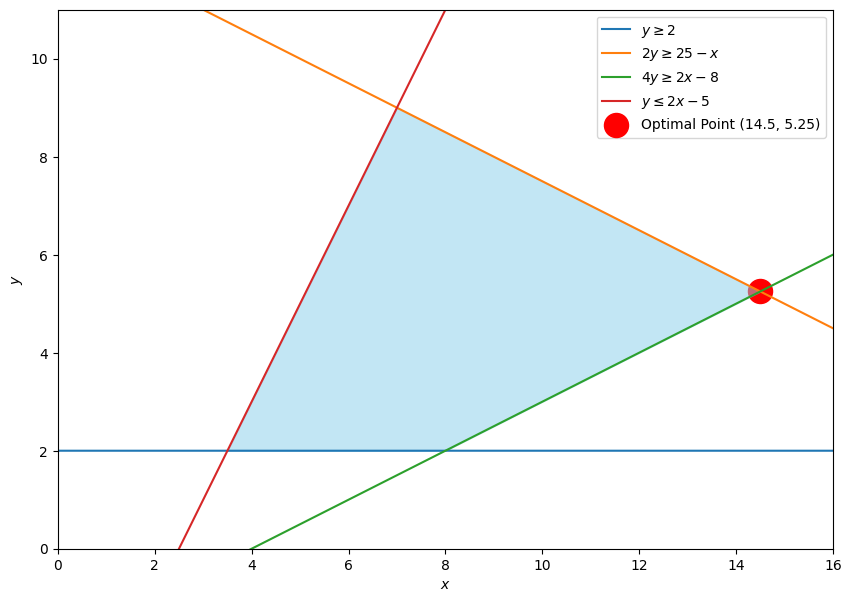

In [22]:
# Construct lines
# x > 0
x = np.linspace(0, 20, 2000)
# y >= 2
y1 = (x*0) + 2
# 2y <= 25 - x
y2 = (25-x)/2.0
# 4y >= 2x - 8 
y3 = (2*x-8)/4.0
# y <= 2x - 5 
y4 = 2 * x -5
# objective 
obj = (73.75 - 4*x)/3

# Make plot
plt.figure(figsize=(10,7))
# Plot the objective function
plt.plot(x, y1, label=r'$y \geq 2$')
plt.plot(x, y2, label=r'$2y \geq 25 - x$')
plt.plot(x, y3, label=r'$4y \geq 2x - 8$')
plt.plot(x, y4,  label=r'$y \leq 2x-5$')
# plt.plot(x, obj, label="$objective = \\frac{73.75 - 4x}{3}$")
plt.scatter(optimal_x, optimal_y, color="red", marker="o", s=300, label=f'Optimal Point {optimal_x, optimal_y}')
plt.xlim((0, 16))
plt.ylim((0, 11))
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
# Fill feasible region
y5 = np.minimum(y2, y4) # 🟠🔴 (min⬇️)
y6 = np.maximum(y1, y3) # 🔵🟢 (max⬆️)
plt.fill_between(x, y5, y6, where=y5>y6, color='skyblue', alpha=0.5)
plt.legend()
plt.show()

# Applications

## Farmer’s problem

With the planting season steadily approaching, your farmer friend presents you with the following problem.

You have 
- 3 tons of potato seeds and 
- 4 tons of carrot seeds. 

To grow the crops efficiently, you also have 

- 5 tons of fertilizer, which has to be used when planting in a 
1:1 ratio (i.e. 1 kilogram of potatoes or carrots requires  1 kilogram of fertilizer). 

The profit is 
- 1.2$/kg  for potato seeds 
- 1.7$/kg for carrot seeds.

How much potatoes and carrots should you plant to maximize your profit this season?

In [23]:
model = LpProblem("Farming", LpMaximize)

# variables - how much do we plant?
x_p = LpVariable(name="potatoes", lowBound=0)
x_c = LpVariable(name="carrots", lowBound=0)

# inequalities - don't use more than we have
model += x_p       <= 3000  # potatoes
model +=       x_c <= 4000  # carrots
model += x_p + x_c <= 5000  # fertilizer

# objective function - maximize the profit
model += x_p * 1.2 + x_c * 1.7

In [24]:
model

Farming:
MAXIMIZE
1.7*carrots + 1.2*potatoes + 0.0
SUBJECT TO
_C1: potatoes <= 3000

_C2: carrots <= 4000

_C3: carrots + potatoes <= 5000

VARIABLES
carrots Continuous
potatoes Continuous

In [25]:
status = model.solve()
status

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/conda/lib/python3.10/site-packages/pulp/solverdir/cbc/linux/64/cbc /tmp/16c3d56eec0e48a08603022937cd5cef-pulp.mps max timeMode elapsed branch printingOptions all solution /tmp/16c3d56eec0e48a08603022937cd5cef-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 8 COLUMNS
At line 15 RHS
At line 19 BOUNDS
At line 20 ENDATA
Problem MODEL has 3 rows, 2 columns and 4 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Presolve 1 (-2) rows, 2 (0) columns and 2 (-2) elements
0  Obj -0 Dual inf 2.899998 (2)
1  Obj 8000
Optimal - objective value 8000
After Postsolve, objective 8000, infeasibilities - dual 0 (0), primal 0 (0)
Optimal objective 8000 - 1 iterations time 0.002, Presolve 0.00
Option for printingOptions changed from normal to all
Total time (CPU seconds):       0.00   (Wallclock seconds):       0.00



1

In [26]:
print("potatoes:", x_p.value())
print("carrots:", x_c.value())
print("profit:", model.objective.value())

potatoes: 1000.0
carrots: 4000.0
profit: 8000.0


## Knapsack problem
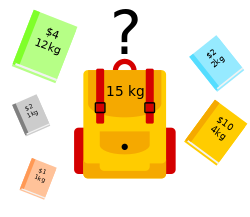
>which books should be chosen to maximize the amount of money while still keeping the overall weight under or equal to 15 kg
https://en.wikipedia.org/wiki/Knapsack_problem

In [27]:
# Example data (values, weights, and capacity)
values = [10, 4, 8, 5, 3]
weights = [5, 2, 8, 3, 1]
capacity = 10

# Create a binary variable for each item
items = range(len(values))
x = LpVariable.dicts("item", items, cat="Binary")

x


{0: item_0, 1: item_1, 2: item_2, 3: item_3, 4: item_4}

In [28]:
# Create the knapsack problem as an LP problem
knapsack_problem = LpProblem("Knapsack", LpMaximize)

In [29]:
# Objective function: Maximize the total value
knapsack_problem += lpSum([values[i] * x[i] for i in items])

# Constraint: Total weight must not exceed the capacity
knapsack_problem += lpSum([weights[i] * x[i] for i in items]) <= capacity


In [30]:
knapsack_problem
'''
Maximize W*ITEMS
Subject to 
        ∑(W*ITEMS) <= 10 (Capacity)
Variables 
is whether this item is selected or no
'''

'\nMaximize W*ITEMS\nSubject to \n        ∑(W*ITEMS) <= 10 (Capacity)\nVariables \nis whether this item is selected or no\n'

In [31]:
print(x)
# for example is this x item selected
print(x[1].value())
# for example is this x item selected
print(x[2].value())

{0: item_0, 1: item_1, 2: item_2, 3: item_3, 4: item_4}
None
None


In [32]:
# Solve the problem
knapsack_problem.solve()

# Print the results
print("Status:", knapsack_problem.status)
print("Total value:", lpSum([values[i] * x[i].value() for i in items]))
print("Total Weight:", lpSum([weights[i] * x[i].value() for i in items]))
print("Selected items:")
for i in items:
    # if this item is selected
    if x[i].value() == 1:
        print(f"Item {i + 1}: Value={values[i]}, Weight={weights[i]}")

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/conda/lib/python3.10/site-packages/pulp/solverdir/cbc/linux/64/cbc /tmp/5f9a504a51bc409caefc099369bfb5ff-pulp.mps max timeMode elapsed branch printingOptions all solution /tmp/5f9a504a51bc409caefc099369bfb5ff-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 6 COLUMNS
At line 27 RHS
At line 29 BOUNDS
At line 35 ENDATA
Problem MODEL has 1 rows, 5 columns and 5 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 20.3333 - 0.00 seconds
Cgl0004I processed model has 1 rows, 5 columns (5 integer (5 of which binary)) and 5 elements
Cutoff increment increased from 1e-05 to 0.9999
Cbc0038I Initial state - 1 integers unsatisfied sum - 0.333333
Cbc0038I Pass   1: suminf.    0.20000 (1) obj. -20 iterations 1
Cbc0038I Solution found of -12
Cbc0038I Before mini branch and bound, 3 integers at bound fixed 

## SUDOKU

In [33]:
# All rows, columns and values within a Sudoku take values from 1 to 9
VALS = ROWS = COLS = range(1, 10)

In [34]:
# The boxes list is created, with the row and column index of each square in each box
Boxes = [
    [(3 * i + k + 1, 3 * j + l + 1) for k in range(3) for l in range(3)]
    for i in range(3)
    for j in range(3)
]
Boxes
'''
[box1]
[box2]
...
[box9]
'''

'\n[box1]\n[box2]\n...\n[box9]\n'

In [35]:
# The prob variable is created to contain the problem data
prob = LpProblem("Sudoku_Problem")

In [36]:
# The decision variables are created
# you can choose (select 0,1) a row or a column that it's value [1,.., 9]
choices = LpVariable.dicts("Choice", (VALS, ROWS, COLS), cat="Binary")

In [37]:
choices

{1: {1: {1: Choice_1_1_1,
   2: Choice_1_1_2,
   3: Choice_1_1_3,
   4: Choice_1_1_4,
   5: Choice_1_1_5,
   6: Choice_1_1_6,
   7: Choice_1_1_7,
   8: Choice_1_1_8,
   9: Choice_1_1_9},
  2: {1: Choice_1_2_1,
   2: Choice_1_2_2,
   3: Choice_1_2_3,
   4: Choice_1_2_4,
   5: Choice_1_2_5,
   6: Choice_1_2_6,
   7: Choice_1_2_7,
   8: Choice_1_2_8,
   9: Choice_1_2_9},
  3: {1: Choice_1_3_1,
   2: Choice_1_3_2,
   3: Choice_1_3_3,
   4: Choice_1_3_4,
   5: Choice_1_3_5,
   6: Choice_1_3_6,
   7: Choice_1_3_7,
   8: Choice_1_3_8,
   9: Choice_1_3_9},
  4: {1: Choice_1_4_1,
   2: Choice_1_4_2,
   3: Choice_1_4_3,
   4: Choice_1_4_4,
   5: Choice_1_4_5,
   6: Choice_1_4_6,
   7: Choice_1_4_7,
   8: Choice_1_4_8,
   9: Choice_1_4_9},
  5: {1: Choice_1_5_1,
   2: Choice_1_5_2,
   3: Choice_1_5_3,
   4: Choice_1_5_4,
   5: Choice_1_5_5,
   6: Choice_1_5_6,
   7: Choice_1_5_7,
   8: Choice_1_5_8,
   9: Choice_1_5_9},
  6: {1: Choice_1_6_1,
   2: Choice_1_6_2,
   3: Choice_1_6_3,
   4: Choice_1

In [38]:
#  we don’t define an objective function since we are only concerned with any variable combination that can satisfy the constraints.
# any solution is good no better solution 
# A constraint ensuring that only one value can be in each square is created
for r in ROWS:
    for c in COLS:
        prob += lpSum([choices[v][r][c] for v in VALS]) == 1

In [39]:
#These constraints ensure that each number (value) can only occur once in each row, column and box.
# The row, column and box constraints are added for each value
for v in VALS:
    for r in ROWS:
        prob += lpSum([choices[v][r][c] for c in COLS]) == 1

    for c in COLS:
        prob += lpSum([choices[v][r][c] for r in ROWS]) == 1

    for b in Boxes:
        prob += lpSum([choices[v][r][c] for (r, c) in b]) == 1

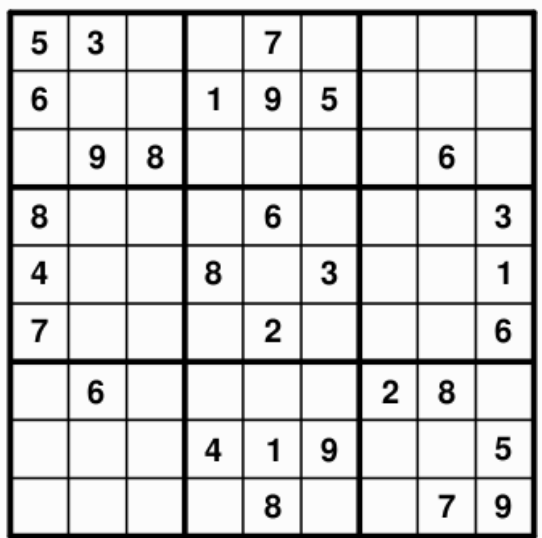

In [48]:
# The starting numbers are entered as constraints i.e a 5 in row 1 column 1 is true.
# Starting State
input_data = [
    (5, 1, 1), # put 5 in row 1 col 1
    (6, 2, 1), # put 6 in row 2 col 1
    (8, 4, 1),
    (4, 5, 1),
    (7, 6, 1),
    (3, 1, 2),
    (9, 3, 2),
    (6, 7, 2),
    (8, 3, 3),
    (1, 2, 4),
    (8, 5, 4),
    (4, 8, 4),
    (7, 1, 5),
    (9, 2, 5),
    (6, 4, 5),
    (2, 6, 5),
    (1, 8, 5),
    (8, 9, 5),
    (5, 2, 6),
    (3, 5, 6),
    (9, 8, 6),
    (2, 7, 7),
    (6, 3, 8),
    (8, 7, 8),
    (7, 9, 8),
    (3, 4, 9),
    (1, 5, 9),
    (6, 6, 9),
    (5, 8, 9),
]

for v, r, c in input_data:
    prob += choices[v][r][c] == 1

In [41]:
prob

Sudoku_Problem:
MINIMIZE
None
SUBJECT TO
_C1: Choice_1_1_1 + Choice_2_1_1 + Choice_3_1_1 + Choice_4_1_1 + Choice_5_1_1
 + Choice_6_1_1 + Choice_7_1_1 + Choice_8_1_1 + Choice_9_1_1 = 1

_C2: Choice_1_1_2 + Choice_2_1_2 + Choice_3_1_2 + Choice_4_1_2 + Choice_5_1_2
 + Choice_6_1_2 + Choice_7_1_2 + Choice_8_1_2 + Choice_9_1_2 = 1

_C3: Choice_1_1_3 + Choice_2_1_3 + Choice_3_1_3 + Choice_4_1_3 + Choice_5_1_3
 + Choice_6_1_3 + Choice_7_1_3 + Choice_8_1_3 + Choice_9_1_3 = 1

_C4: Choice_1_1_4 + Choice_2_1_4 + Choice_3_1_4 + Choice_4_1_4 + Choice_5_1_4
 + Choice_6_1_4 + Choice_7_1_4 + Choice_8_1_4 + Choice_9_1_4 = 1

_C5: Choice_1_1_5 + Choice_2_1_5 + Choice_3_1_5 + Choice_4_1_5 + Choice_5_1_5
 + Choice_6_1_5 + Choice_7_1_5 + Choice_8_1_5 + Choice_9_1_5 = 1

_C6: Choice_1_1_6 + Choice_2_1_6 + Choice_3_1_6 + Choice_4_1_6 + Choice_5_1_6
 + Choice_6_1_6 + Choice_7_1_6 + Choice_8_1_6 + Choice_9_1_6 = 1

_C7: Choice_1_1_7 + Choice_2_1_7 + Choice_3_1_7 + Choice_4_1_7 + Choice_5_1_7
 + Choice_6_1_7 +

In [42]:
prob.solve()

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/conda/lib/python3.10/site-packages/pulp/solverdir/cbc/linux/64/cbc /tmp/b33664058046468fb16b9d973b60c976-pulp.mps timeMode elapsed branch printingOptions all solution /tmp/b33664058046468fb16b9d973b60c976-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 358 COLUMNS
At line 4763 RHS
At line 5117 BOUNDS
At line 5848 ENDATA
Problem MODEL has 353 rows, 730 columns and 2945 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 0 - 0.00 seconds
Cgl0004I processed model has 0 rows, 0 columns (0 integer (0 of which binary)) and 0 elements
Cbc3007W No integer variables - nothing to do
Cuts at root node changed objective from 0 to -1.79769e+308
Probing was tried 0 times and created 0 cuts of which 0 were active after adding rounds of cuts (0.000 seconds)
Gomory was tried 0 times and created 0 cuts of w

1

In [43]:
# The status of the solution is printed to the screen
print("Status:", LpStatus[prob.status])

Status: Optimal


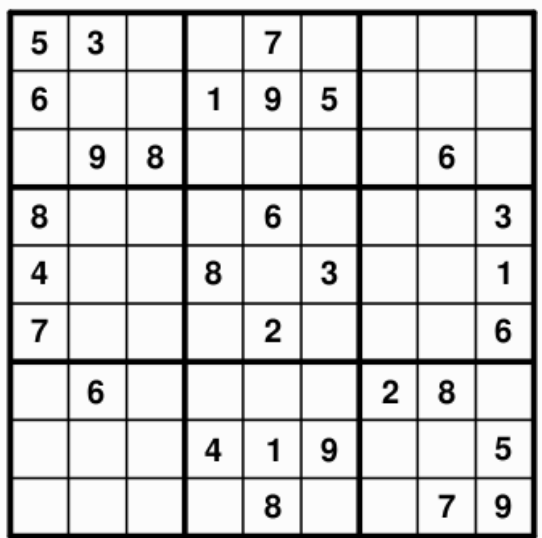

In [44]:
# The solution is printed to the console
for r in ROWS:
    if r in [1, 4, 7]:
        print("+-------+-------+-------+")
    for c in COLS:
        for v in VALS:
            if value(choices[v][r][c]) == 1:
                if c in [1, 4, 7]:
                    print("|", end=" ")
                print(v, end=" ")
                if c == 9:
                    print("|")
print("+-------+-------+-------+")


+-------+-------+-------+
| 5 3 4 | 6 7 8 | 9 1 2 |
| 6 7 2 | 1 9 5 | 3 4 8 |
| 1 9 8 | 3 4 2 | 5 6 7 |
+-------+-------+-------+
| 8 5 9 | 7 6 1 | 4 2 3 |
| 4 2 6 | 8 5 3 | 7 9 1 |
| 7 1 3 | 9 2 4 | 8 5 6 |
+-------+-------+-------+
| 9 6 1 | 5 3 7 | 2 8 4 |
| 2 8 7 | 4 1 9 | 6 3 5 |
| 3 4 5 | 2 8 6 | 1 7 9 |
+-------+-------+-------+


## Resources

- https://benalexkeen.com/linear-programming-with-python-and-pulp-part-5/
- https://coin-or.github.io/pulp/CaseStudies/a_sudoku_problem.html
- https://en.wikipedia.org/wiki/Knapsack_problem
- https://slama.dev/youtube/linear-programming-in-python/#partition-problem